## Import Library

In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

## Load dan Eksplorasi Data

In [35]:
# Load data
df = pd.read_csv('../data/spam.csv', encoding='latin-1')
print("Shape data:", df.shape)
print("\nInfo data:")
print(df.info())
print("\nSample data:")
df.head()

Shape data: (5572, 5)

Info data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB
None

Sample data:


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df = df.iloc[:, :2]
df.columns = ['label', 'message']
print("Data setelah dibersihkan:")
print(df.head())
print("\nDistribusi label:")
print(df['label'].value_counts())

Data setelah dibersihkan:
  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

Distribusi label:
label
ham     4825
spam     747
Name: count, dtype: int64


## Persiapan Data

In [37]:
# Pisahkan fitur dan target
X = df['message']
y = df['label']

# Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Jumlah data training: {len(X_train)}")
print(f"Jumlah data testing: {len(X_test)}")

Jumlah data training: 4457
Jumlah data testing: 1115


## Model 1: Multinomial Naive Bayes dengan `CountVectorizer`

In [38]:
# Ekstraksi fitur dengan CountVectorizer (dengan stop_words)
cv = CountVectorizer(stop_words='english')
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

print(f"Jumlah fitur CountVectorizer: {X_train_cv.shape[1]}")
print(f"Shape data training: {X_train_cv.shape}")
print(f"Shape data testing: {X_test_cv.shape}")

Jumlah fitur CountVectorizer: 7472
Shape data training: (4457, 7472)
Shape data testing: (1115, 7472)


In [39]:
# Training model Multinomial Naive Bayes
mnb_cv = MultinomialNB()
mnb_cv.fit(X_train_cv, y_train)

# Prediksi
y_pred_cv = mnb_cv.predict(X_test_cv)

print("Model berhasil ditraining!")

Model berhasil ditraining!


### Evaluasi Model CountVectorizer

In [40]:
# Evaluasi model CountVectorizer
accuracy_cv = accuracy_score(y_test, y_pred_cv)
print("="*60)
print("EVALUASI MODEL COUNTVECTORIZER")
print("="*60)
print(f"\nAccuracy: {accuracy_cv:.4f} ({accuracy_cv*100:.2f}%)")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_cv))
print("\nConfusion Matrix:")
cm_cv = confusion_matrix(y_test, y_pred_cv)
print(cm_cv)

EVALUASI MODEL COUNTVECTORIZER

Accuracy: 0.9839 (98.39%)

Classification Report:
              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       965
        spam       0.96      0.92      0.94       150

    accuracy                           0.98      1115
   macro avg       0.97      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115


Confusion Matrix:
[[959   6]
 [ 12 138]]


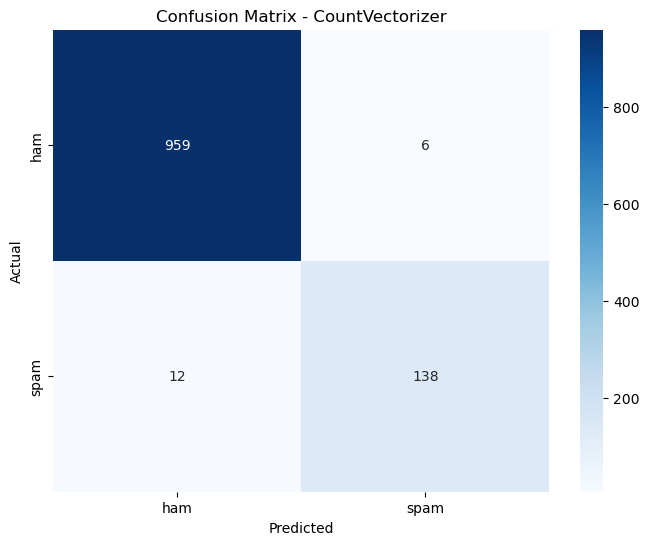

In [ ]:
# Visualisasi Confusion Matrix CountVectorizer
plt.figure(figsize=(8, 6))
sns.heatmap(cm_cv, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.title('Confusion Matrix - CountVectorizer')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## Model 2: Multinomial Naive Bayes dengan `TF-IDF`

In [42]:
# Ekstraksi fitur dengan TF-IDF (dengan stop_words)
tfidf = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print(f"Jumlah fitur TF-IDF: {X_train_tfidf.shape[1]}")
print(f"Shape data training: {X_train_tfidf.shape}")
print(f"Shape data testing: {X_test_tfidf.shape}")

Jumlah fitur TF-IDF: 7472
Shape data training: (4457, 7472)
Shape data testing: (1115, 7472)


In [43]:
# Training model Multinomial Naive Bayes
mnb_tfidf = MultinomialNB()
mnb_tfidf.fit(X_train_tfidf, y_train)

# Prediksi
y_pred_tfidf = mnb_tfidf.predict(X_test_tfidf)

print("Model berhasil ditraining!")

Model berhasil ditraining!


### Evaluasi Model TF-IDF

In [44]:
# Evaluasi model TF-IDF
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
print("="*60)
print("EVALUASI MODEL TF-IDF")
print("="*60)
print(f"\nAccuracy: {accuracy_tfidf:.4f} ({accuracy_tfidf*100:.2f}%)")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_tfidf))
print("\nConfusion Matrix:")
cm_tfidf = confusion_matrix(y_test, y_pred_tfidf)
print(cm_tfidf)

EVALUASI MODEL TF-IDF

Accuracy: 0.9668 (96.68%)

Classification Report:
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       965
        spam       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115


Confusion Matrix:
[[965   0]
 [ 37 113]]


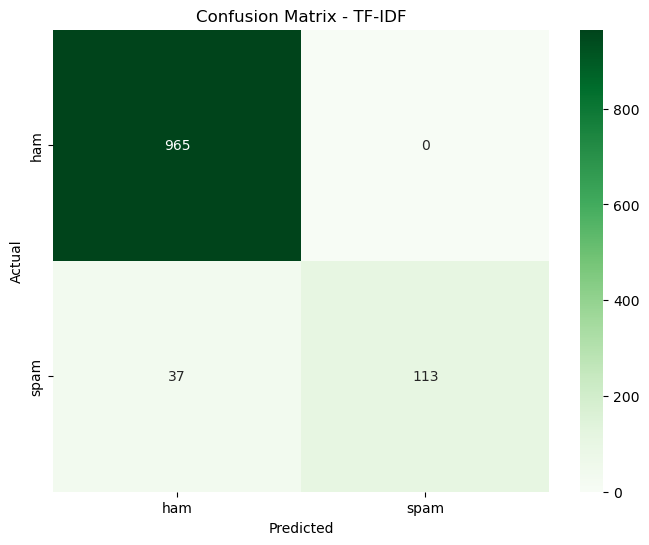

In [45]:
# Visualisasi Confusion Matrix TF-IDF
plt.figure(figsize=(8, 6))
sns.heatmap(cm_tfidf, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.title('Confusion Matrix - TF-IDF')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## 6. Perbandingan Hasil Kedua Model

In [ ]:
comparison_data = {
    'Metode': ['CountVectorizer', 'TF-IDF'],
    'Accuracy': [accuracy_cv, accuracy_tfidf],
    'Jumlah Fitur': [X_train_cv.shape[1], X_train_tfidf.shape[1]]
}

comparison_df = pd.DataFrame(comparison_data)
print("="*60)
print("PERBANDINGAN HASIL KEDUA MODEL")
print("="*60)
print(comparison_df.to_string(index=False))
print("\n")
print(f"Selisih Accuracy: {abs(accuracy_cv - accuracy_tfidf):.4f} ({abs(accuracy_cv - accuracy_tfidf)*100:.2f}%)")

PERBANDINGAN HASIL KEDUA MODEL
         Metode  Accuracy  Jumlah Fitur
CountVectorizer  0.983857          7472
         TF-IDF  0.966816          7472


Selisih Accuracy: 0.0170 (1.70%)


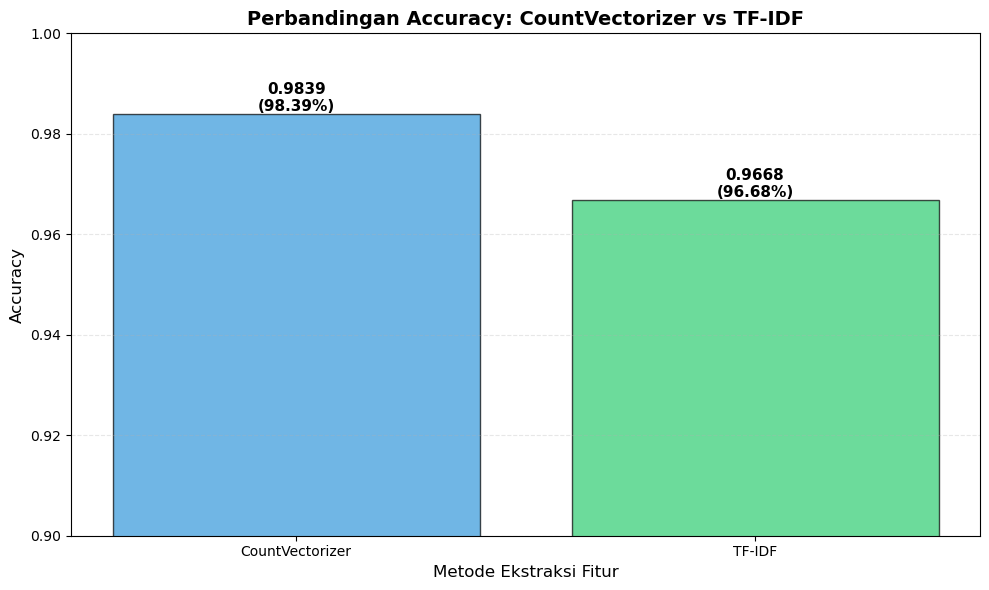

In [ ]:
# Visualisasi
plt.figure(figsize=(10, 6))
methods = ['CountVectorizer', 'TF-IDF']
accuracies = [accuracy_cv, accuracy_tfidf]
colors = ['#3498db', '#2ecc71']

bars = plt.bar(methods, accuracies, color=colors, alpha=0.7, edgecolor='black')
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Metode Ekstraksi Fitur', fontsize=12)
plt.title('Perbandingan Accuracy: CountVectorizer vs TF-IDF', fontsize=14, fontweight='bold')
plt.ylim([0.9, 1.0])

for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{accuracies[i]:.4f}\n({accuracies[i]*100:.2f}%)',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

In [48]:
# Perbandingan detail metrik dari classification report
from sklearn.metrics import precision_score, recall_score, f1_score

# Hitung metrik untuk CountVectorizer
precision_cv = precision_score(y_test, y_pred_cv, pos_label='spam')
recall_cv = recall_score(y_test, y_pred_cv, pos_label='spam')
f1_cv = f1_score(y_test, y_pred_cv, pos_label='spam')

# Hitung metrik untuk TF-IDF
precision_tfidf = precision_score(y_test, y_pred_tfidf, pos_label='spam')
recall_tfidf = recall_score(y_test, y_pred_tfidf, pos_label='spam')
f1_tfidf = f1_score(y_test, y_pred_tfidf, pos_label='spam')

# Membuat tabel perbandingan detail
detailed_comparison = pd.DataFrame({
    'Metrik': ['Accuracy', 'Precision (Spam)', 'Recall (Spam)', 'F1-Score (Spam)'],
    'CountVectorizer': [accuracy_cv, precision_cv, recall_cv, f1_cv],
    'TF-IDF': [accuracy_tfidf, precision_tfidf, recall_tfidf, f1_tfidf]
})

print("="*70)
print("PERBANDINGAN DETAIL METRIK EVALUASI")
print("="*70)
print(detailed_comparison.to_string(index=False))
print("\n")

PERBANDINGAN DETAIL METRIK EVALUASI
          Metrik  CountVectorizer   TF-IDF
        Accuracy         0.983857 0.966816
Precision (Spam)         0.958333 1.000000
   Recall (Spam)         0.920000 0.753333
 F1-Score (Spam)         0.938776 0.859316


